# Working with Other Data

In the previous chapter, we showed you how to work with TensorFlow Datasets. But, what if you have another type of dataset? In this chapter, we will show you how to work with other types of data with TensorFlow.

# Build TensorFlow input pipelines with tf.data

Although our content is designed for a beginner, TensorFlow is a very complex module. So, we must introduce the reader to complex terminology. But, don't get worried! The examples we show are simple, clear, and explained in detail so that even a beginner should be able to grasp the content.

Let's begin with terminology surrounding the tf.data API. The **tf.data** API enables you to build simple to complex input pipelines from simple and reusable pieces. For example, the pipeline for an image model might aggregate data from files in a distributed file system, apply random perturbations to each image, and merge randomly selected images into a batch for training.

**Data perturbation** is a form of privacy-preserving data mining for electronic health records (EHR). There are two main types of data perturbation appropriate for EHR data protection. The first type is known as the probability distribution approach and the second type is called the value distortion approach. Data pertubation is considered a relatively easy and effective technique in for protecting sensitive electronic data from unauthorized use.

The pipeline for a text model might involve extracting symbols from raw text data, converting them to embedding identifiers with a lookup table, and batching together sequences of different lengths. The tf.data API makes it possible to handle large amounts of data, read from different data formats, and perform complex transformations.

The tf.data API introduces a tf.data.Dataset abstraction that represents a sequence of elements where each element consists of one or more components. For example, in an image pipeline, an element might be a single training example, with a pair of tensor components representing the image and its label.

There are **two** distinct ways to create a dataset:

1. A data source constructs a Dataset from data stored in memory or in one or more files.

2. A data transformation constructs a dataset from one or more tf.data.Dataset objects.

You can explore this topic in more depth by perusing this URL:

* https://www.tensorflow.org/guide/data

# Enable the GPU

Enable the GPU (if not already enabled):
1.	click **Runtime** in the top left menu
2.	click **Change runtime type** from the drop-down menu
3.	choose **GPU** from the *Hardware accelerator* drop-down menu
4.	click **SAVE**

In [1]:
import tensorflow as tf

# display tf version and test if GPU is active

tf.__version__, tf.test.gpu_device_name()

('2.3.0', '/device:GPU:0')

Import the tensorflow library. If '/device:GPU:0' is displayed, the GPU is active. If '..' is displayed, the regular CPU is active.

# Basic mechanics

To create an input pipeline, we must start with a data source. To construct a Dataset from data in memory that TensorFlow can work with, we can use **tf.data.Dataset.from_tensor_slices()** or **tf.data.Dataset.from_tensors()**. *from_tensor_slices* creates a dataset with a separate element for each piece of the input tensor. *from_tensors* combines the input and returns a dataset with a single element.

The Dataset object is a Python iterable. This makes it possible to consume its elements using a for loop. So, let's first create a tensor with **tf.data.Dataset.from_tensor_slices()**:

In [3]:
# create a 1D tensor

ds = tf.data.Dataset.from_tensor_slices([8, 3, 0, 8, 2, 1])
ds.element_spec

TensorSpec(shape=(), dtype=tf.int32, name=None)

We take the list [8, 3, 0, 8, 2, 1] and create a TensorSpec for TensorFlow consumption. That is, TensorFlow can only work with data created in a specific manner like we just did in this example.

Now, let's iterate it:

In [4]:
# iterate and display tensor values

for elem in ds:
  print(elem.numpy())

print ()

# iterate without numpy method

for elem in ds:
  print(elem)

8
3
0
8
2
1

tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


As expected, *from_tensor_slices* creates a dataset with a **separate** element for each piece of the input tensor.

The **numpy** method provides a convenient way to view tensor values.

We can also create a Python iterator using **iter** and consuming its elements using **next**:

In [5]:
it = iter(ds)

# display the first element

next(it).numpy()

8

Now, let's create a tensor with **tf.data.Dataset.from_tensors()**:

In [6]:
# create a 1D tensor

ds = tf.data.Dataset.from_tensors([8, 3, 0, 8, 2, 1])
ds.element_spec

TensorSpec(shape=(6,), dtype=tf.int32, name=None)

Notice that the shape is different that the one we did before. The dataset created is a 1D tensor with six elements.

In [7]:
# iterate and display tensor values

for elem in ds:
  print(elem.numpy())

print ()

# iterate without numpy method

for elem in ds:
  print(elem)

[8 3 0 8 2 1]

tf.Tensor([8 3 0 8 2 1], shape=(6,), dtype=int32)


As expected, *from_tensors* combines the input and returns a dataset with a **single** element.

# TensorFlow Dataset Structure

A dataset contains elements that each have the same (nested) structure and the individual components of the structure can have any type representable by tf.TypeSpec, including tf.Tensor, tf.sparse.SparseTensor, tf.RaggedTensor, tf.TensorArray or tf.data.Dataset. The Dataset.element_spec property allows us to inspect the type of each element component. The property returns a nested structure of **tf.TypeSpec** objects that match the structure of the element. The element may be a single component, a tuple of components, or a nested tuple of components.

We can better undertand the structure with an example:

In [8]:
br = '\n'  # enter a line break in Colab

# create random uniform numbers

scope = tf.random.uniform([4, 10])

print ('shape:', scope.shape, br)

ds = tf.data.Dataset.from_tensor_slices(scope)

print (ds.element_spec, br)

# Let's look at the first element:

it = iter(ds)

# print first element

print ('first element with an iterator:', br)
print (next(it).numpy(), br)

print ('all four elements:', br)
for i, row in enumerate(ds):
  print ('element ' + str(i+1))  # add 1 as index starts at 0
  print (row.numpy(), br)

shape: (4, 10) 

TensorSpec(shape=(10,), dtype=tf.float32, name=None) 

first element with an iterator: 

[0.0581578  0.79309857 0.69896996 0.81702125 0.98984766 0.86179256
 0.14303482 0.40547097 0.47149003 0.34676874] 

all four elements: 

element 1
[0.0581578  0.79309857 0.69896996 0.81702125 0.98984766 0.86179256
 0.14303482 0.40547097 0.47149003 0.34676874] 

element 2
[0.48216057 0.7784362  0.00329268 0.4117632  0.98375726 0.6739497
 0.83714855 0.4739735  0.64531016 0.614542  ] 

element 3
[0.4155928  0.01736057 0.8834257  0.04957199 0.3123219  0.30262208
 0.1989646  0.7061436  0.31533206 0.61756516] 

element 4
[0.6816633  0.15938675 0.6550262  0.11743009 0.6207055  0.18460059
 0.6497991  0.00868285 0.9807471  0.93145454] 



Since we used *from_tensor_slices*, the dataset consists of 4 separate 1D tensors each containing 10 elements.

# Reading Input Data

If all of your input data fits in memory, the simplest way to create a Dataset for TensorFlow consumption is to convert them to tf.Tensor objects with **Dataset.from_tensor_slices()**.

# Colab Abends

As noted in chapters 1 and 2, we've noticed that when we run Google Colab for a long time (several hours) without pause or load large datasets into memory and process said data, it has the tendency to crash (or abend). When this happens, you have two choices that we know of:

1. Restart all runtimes.

2. Close the program and restart it from scratch.

To restart all runtimes, click the **Runtime** on the top menu, click **Restart all runtimes...**, and click **Yes** when prompted. Google Colab recommends this option. If we are going to restart from scratch, we clear browser history first and then start Google Colab from scratch.

# Batch Size

**Batch size** is the number of training examples *processed* by the neural network model in one pass. Don't get batch size confused with epochs! An **epoch** is a complete pass through the training dataset. So, the number of epochs is the number of complete passes through the training dataset. Epochs have nothing to do with the processing of training examples! They just represent the number of passes through the network. Simply, during each pass (epoch) through the network, a *batch* of the training dataset is processed.

The size of a batch must be more than or equal to one and less than or equal to the number of samples in the training dataset. This makes sense because you can't have a batch that is bigger than the total number of training examples.

TensorFlow is **optimized** to run batches of training data much greater than one. So, a batch size of **one** is *very inefficient*! Since a batch size of one represents the entire training dataset, we are not really batching data. So, unless you don't want to batch data, don't use a batch size of one!

# Keras Data

Let's grab the MNIST dataset from Keras instead of using *tf.load* and *tfds.builder* like we did in chapter 2. Let's begin by reading a **Keras** dataset into memory:

In [9]:
train, test = tf.keras.datasets.mnist.load_data(path='mnist.npz')

11493376/11490434 [==============================] - 0s 0us/step


Both train and test data contain MNIST images and labels in a tuple. We can prove this with the following example:

In [11]:
type(train), type(test)

(tuple, tuple)

Let's explore the shapes of the train and test datasets:

In [12]:
print ('train data:', br)
print (train[0].shape)
print (train[1].shape, br)
print ('test data:', br)
print (test[0].shape)
print (test[1].shape)

train data: 

(60000, 28, 28)
(60000,) 

test data: 

(10000, 28, 28)
(10000,)


As we can see, train data consists of 60000 28x28 feature images and 60000 labels. And, test data consists of 10000 28x28 feature images and 10000 labels.

## Build the Input Pipeline

To prepare training data properly for TensorFlow consumption, we need to grab the images and labels and scale the images. Since pixel data is represented by a range from [0, 255], we divide each of the feature images by 255 to scale. Once we have the images and labels, we can convert it to a tf.Tensor object with *from_tensor_slices*: 

In [13]:
train_images, train_labels = train

train_images = train_images / 255  # divide by 255 to scale

train_k = tf.data.Dataset.from_tensor_slices(
    (train_images, train_labels))
train_k.element_spec

(TensorSpec(shape=(28, 28), dtype=tf.float64, name=None),
 TensorSpec(shape=(), dtype=tf.uint8, name=None))

Let's also create a TensorFlow test dataset:

In [14]:
test_images, test_labels = test

test_images = test_images / 255  # divide by 255 to scale

test_k = tf.data.Dataset.from_tensor_slices(
    (test_images, test_labels))
test_k

<TensorSliceDataset shapes: ((28, 28), ()), types: (tf.float64, tf.uint8)>

## Shuffling, Batching, and Prefetching

Let's shuffle, batch, and prefectch data. We can adjust the batch size higher to see what happens. Changing batch size to 128 and buffer size to 1000 should help the model run faster and be more efficient. As discussed earlier in the chapter, don't ever use a batch size of one!

In [15]:
BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1000

train_kd = train_k.shuffle(
    SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).prefetch(1)
test_kd = test_k.batch(BATCH_SIZE).prefetch(1)

## Create the Model

Now that we have the data prepared for training, let's go ahead and verify that all is well by creating a simple model and training the data.

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow import keras

In [17]:
# clear any previous models

tf.keras.backend.clear_session()

In [18]:
model = Sequential([
  Flatten(input_shape=[28, 28]),
  Dense(512, activation='relu'),
  Dropout(0.5),
  Dense(10, activation='softmax')
])

The model is a feedforward network with densely connected layers. That is, all neurons see the data. The first layer accepts 28 x 28 images and flattens each image into a 1D array consisting of 784 pixels. The second layer accepts data into 512 neurons and uses **relu** activation to minimize loss. The third layer uses **dropout** to mitigate overfitting. The fourth layer is the output layer. It accepts data into 10 neurons because our data has 10 class labels. It uses **softmax** activation to reduce loss.

# Model Summary

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## Compile the Model

Now, we need to compile the model:

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

We use the **sparse_categorical_crossentropy** function to mitigate loss and the **adam** function to tweak loss down even further.

## Train the Model

In [21]:
epochs = 10
history = model.fit(train_kd, epochs=epochs, verbose=1,
                    validation_data=test_kd)

Epoch 1/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3355 - accuracy: 0.9028 - val_loss: 0.1520 - val_accuracy: 0.9543
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1613 - accuracy: 0.9528 - val_loss: 0.1078 - val_accuracy: 0.9671
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1224 - accuracy: 0.9633 - val_loss: 0.0903 - val_accuracy: 0.9723
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0979 - accuracy: 0.9713 - val_loss: 0.0794 - val_accuracy: 0.9753
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0831 - accuracy: 0.9746 - val_loss: 0.0737 - val_accuracy: 0.9757
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0712 - accuracy: 0.9778 - val_loss: 0.0684 - val_accuracy: 0.9780
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0638 - accuracy: 0.9799 - val_loss: 0.0683 - val_accuracy: 0.9770
Epoch 

Since epochs is set at 10, our model processes the dataset **10 times**. Notice that our model did quite well given that accuracy is quite high and loss is low. And, we don't have bad overfitting because our train and test accuracies are pretty close. 

# Scikit-Learn Data

We can also read in datasets from the Scikit-Learn library. First, we need to import the dataset. We can then grab the dataset:

In [22]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

The **fetch_lfw_people** dataset is a collection of JPEG pictures of famous people collected over the internet. All details are available on the official website:

* http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical machine learning task is face verification. So, given a pair of pictures, we predict whether the two images are of the same person.

An alternative machine learning task is face recognition (or face identification). So, given the picture of the face of an unknown person, we identify the name of the person by referring to a gallery of previously seen pictures of identified persons.

## Get Information about the Data

Scikit-Learn datasets can contain several types of data and information. To explore the contents of a Scikit-Learn dataset, we can display its keys:

In [23]:
# get available keys from dataset

print (faces.keys())

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])


So, this dataset contains feature images and targets. It also contains target names and a description of the dataset. The *data* key happens to contain flattened vectors of each image. Let's display the data shapes:

In [24]:
image, target = faces.images, faces.target
data = faces.data
names = faces.target_names

print ('feature image tensor:', br)
print (image.shape, br)
print ('target tensor:', br)
print (target.shape, br)
print ('flattened image tensor:', br)
print (data.shape, br)
print ('target names:', br)
print (names, br)
print ('class labels:', len(names))

feature image tensor: 

(1288, 50, 37) 

target tensor: 

(1288,) 

flattened image tensor: 

(1288, 1850) 

target names: 

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair'] 

class labels: 7


The feature image tensor consists of 1288 50x37 face images. The target tensor consists of 1288 targets. Finally, the data shape consists of 1288 flattened vectors each with 1850 elements. We get 1850 by multiplying 50 by 37.

## Explore the First Example

Now, let's explore the first example:

first image example: 

[[254.       254.       251.66667  ...  65.333336  50.666668  40.333332]
 [253.33333  251.33333  247.33333  ...  66.666664  52.        42.666668]
 [240.66667  231.66667  211.66667  ...  62.        49.        42.      ]
 ...
 [ 74.333336  54.        31.666666 ...  97.666664  93.        90.      ]
 [ 65.333336  47.        30.333334 ...  91.666664  92.        86.333336]
 [ 59.333332  44.333332  32.333332 ...  87.333336  88.666664  86.666664]] 

first target example: 

5 

name of first target: 

Hugo Chavez 

first data example (flattened image): 

[254.       254.       251.66667  ...  87.333336  88.666664  86.666664] 

first image: 



Text(0.5, 1.0, 'Hugo Chavez')

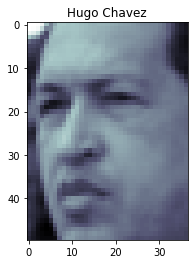

In [25]:
# display the first data example

i = 0

print ('first image example:', br)
print (image[i], br)

print ('first target example:', br)
print (target[i], br)

print ('name of first target:', br)
print (names[target[i]], br)

print ('first data example (flattened image):', br)
print (data[i], br)

print ('first image:', br)

import matplotlib.pyplot as plt

# display the first image in the dataset

plt.imshow(image[i], cmap='bone')
plt.title(names[target[i]])

Each image is represented by a 2D matrix. The target for the first image is **5**, which just happens to be an image of **Hugo Chavez**. We also display the first image as a flattened vector.

## Build the Input Pipeline

Now, let's prepare this dataset for TensorFlow consumption. First, we need to create train and test datsets. Next, we need to scale image data. Finally, we can create TensorFlow tensors and prepare them for training:

In [35]:
from sklearn.model_selection import train_test_split

# create train and test data
X_train, X_test, y_train, y_test = train_test_split(
    image, target, test_size=0.33, random_state=0)

# scale feature image data and create TensorFlow tensors
x_train = X_train / 255.0
x_test = X_test / 255.0

# get shapes
print ('x_train shape:', end=' ')
print (x_train.shape)
print ('x_test shape:', end=' ')
print (x_test.shape)

# get sample entries
print (x_train[0])
print (X_train[0][0][0])
print (x_train[0][0][0])

x_train shape: (862, 50, 37)
x_test shape: (426, 50, 37)
[[0.35424837 0.3895425  0.44575164 ... 0.5816993  0.55947715 0.6       ]
 [0.3712418  0.4013072  0.45620915 ... 0.64052284 0.5647059  0.5346405 ]
 [0.3647059  0.40392157 0.46666667 ... 0.6431373  0.593464   0.49673203]
 ...
 [0.81830066 0.7124183  0.50980395 ... 0.10326798 0.10196079 0.10849673]
 [0.8496732  0.85490197 0.779085   ... 0.09411765 0.09803922 0.10588235]
 [0.848366   0.8771242  0.89542484 ... 0.09150327 0.09803922 0.10588235]]
90.333336
0.35424837


Slice data into TensorFlow consumable pieces:

In [36]:
faces_train = tf.data.Dataset.from_tensor_slices(
    (X_train, y_train))
faces_test = tf.data.Dataset.from_tensor_slices(
    (X_test, y_test))

Set batch and buffer sizes:

In [40]:
BATCH_SIZE = 16
SHUFFLE_BUFFER_SIZE = 100

Now, let's shuffle, batch and prefetch.

In [43]:
faces_train_ds = (faces_train
                  .shuffle(SHUFFLE_BUFFER_SIZE)
                  .batch(BATCH_SIZE).prefetch(1))
faces_test_ds = (faces_test
                 .batch(BATCH_SIZE).prefetch(1))

Now, we have the data ready for training. Notice that our batch size is smaller at 16 because our dataset is only 1288 samples.

Inspect tensors:

In [44]:
faces_train_ds, faces_test_ds

(<PrefetchDataset shapes: ((None, 50, 37), (None,)), types: (tf.float32, tf.int64)>,
 <PrefetchDataset shapes: ((None, 50, 37), (None,)), types: (tf.float32, tf.int64)>)

## Build the Model

Again, let's build a simple model and train the data to verify that we prepared the data properly.

In [45]:
import numpy as np

class_labels = len(names)

# clear previous model and generate a seed
tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

model = Sequential([
  Flatten(input_shape=[50, 37]),
  Dense(16, activation='relu'),
  Dense(class_labels, activation='softmax')
])

## Model Summary

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1850)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                29616     
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 119       
Total params: 29,735
Trainable params: 29,735
Non-trainable params: 0
_________________________________________________________________


## Compile the Model

In [47]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the Model

In [48]:
history = model.fit(faces_train_ds, epochs=10,
                    validation_data=faces_test_ds)

Epoch 1/10
54/54 [==============================] - 0s 6ms/step - loss: 11.5957 - accuracy: 0.3550 - val_loss: 1.9478 - val_accuracy: 0.4061
Epoch 2/10
54/54 [==============================] - 0s 4ms/step - loss: 1.9163 - accuracy: 0.4130 - val_loss: 1.9267 - val_accuracy: 0.4061
Epoch 3/10
54/54 [==============================] - 0s 4ms/step - loss: 1.8953 - accuracy: 0.4130 - val_loss: 1.9066 - val_accuracy: 0.4061
Epoch 4/10
54/54 [==============================] - 0s 4ms/step - loss: 1.8755 - accuracy: 0.4130 - val_loss: 1.8872 - val_accuracy: 0.4061
Epoch 5/10
54/54 [==============================] - 0s 4ms/step - loss: 1.8567 - accuracy: 0.4130 - val_loss: 1.8694 - val_accuracy: 0.4061
Epoch 6/10
54/54 [==============================] - 0s 4ms/step - loss: 1.8392 - accuracy: 0.4130 - val_loss: 1.8528 - val_accuracy: 0.4061
Epoch 7/10
54/54 [==============================] - 0s 4ms/step - loss: 1.8231 - accuracy: 0.4130 - val_loss: 1.8374 - val_accuracy: 0.4061
Epoch 8/10
54/54 [=

To get better performance, we need to build a better model. But, we just want to show you how to model this dataset.

# Numpy Data

Let's read MNIST from a numpy file and process:

In [49]:
DATA_URL = 'https://storage.googleapis.com/\
tensorflow/tf-keras-datasets/mnist.npz'

path = tf.keras.utils.get_file('mnist.npz', DATA_URL)
with np.load(path) as data:
  train_examples = data['x_train']
  train_labels = data['y_train']
  test_examples = data['x_test']
  test_labels = data['y_test']

train_scaled = train_examples / 255.
test_scaled = test_examples / 255.

## Load NumPy arrays with tf.data.Dataset

Assuming you have an array of examples and a corresponding array of labels, pass the two arrays as a tuple into tf.data.Dataset.from_tensor_slices to create a tf.data.Dataset.

In [52]:
train_dataset = tf.data.Dataset.from_tensor_slices(
    (train_scaled, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices(
    (test_scaled, test_labels))

## Prepare Data for Training

In [53]:
BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1000

train_np = train_dataset.shuffle(
    SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).prefetch(1)
test_np = test_dataset.batch(BATCH_SIZE).prefetch(1)

Inspect tensors:

In [54]:
train_np, test_np

(<PrefetchDataset shapes: ((None, 28, 28), (None,)), types: (tf.float64, tf.uint8)>,
 <PrefetchDataset shapes: ((None, 28, 28), (None,)), types: (tf.float64, tf.uint8)>)

## Create Model

In [55]:
keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

model = Sequential([
  Flatten(input_shape=[28, 28]),
  Dense(512, activation='relu'),
  Dropout(0.5),
  Dense(10, activation='softmax')
])

## Model Summary

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## Compile the Model

In [57]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the Model

In [58]:
epochs = 10
history = model.fit(train_np, epochs=epochs, verbose=1,
                    validation_data=test_np)

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3373 - accuracy: 0.9007 - val_loss: 0.1587 - val_accuracy: 0.9517
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1607 - accuracy: 0.9528 - val_loss: 0.1078 - val_accuracy: 0.9687
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1197 - accuracy: 0.9639 - val_loss: 0.0931 - val_accuracy: 0.9705
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0972 - accuracy: 0.9704 - val_loss: 0.0814 - val_accuracy: 0.9740
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0837 - accuracy: 0.9740 - val_loss: 0.0729 - val_accuracy: 0.9772
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0755 - accuracy: 0.9765 - val_loss: 0.0738 - val_accuracy: 0.9764
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0641 - accuracy: 0.9798 - val_loss: 0.0698 - val_accuracy: 0.9777
Epoch 

# Get Data from GitHub

You can access any free standing dataset for this book directly from GitHub with a few simple steps:

1. visit the book URL: https://github.com/paperd/tensorflow
2. locate the dataset and click on it
3. click the **Raw** button
4. copy the URL to Colab and assign it to a variable
5. read the dataset with Pandas **read_csv** method



For example, let's read a CSV dataset from GitHub. We've already located the appropriate URL and assigned to a variable as so:


In [59]:
url = 'https://raw.githubusercontent.com/paperd/tensorflow/\
master/chapter4/data/winequality-red.csv'

Read the dataset into a Pandas DataFrame:

In [61]:
import pandas as pd

wine = pd.read_csv(url, sep = ';')

Verify that data was read properly:

In [62]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# CSV data

A **CSV** dataset is a comma-separated values file that allows data to be saved in a tabular format. CSV data looks like a conventional spreadsheet but with a **.csv** extension. CSV files can be used with any spreadsheet program that we know of including Microsoft Excel or Google Spreadsheets.


Let's grab a CSV dataset commonly used for machine learning applications. A great place to start is the UCI Machine Learning Repository. The **UCI Machine Learning Repository** is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

The main site for the repository is located at the following URL:

* https://archive.ics.uci.edu/ml/datasets.php

You can explore this cite to identify a dataset for many different machine learning applications.

We have worked with a specific dataset that we like and that is very commonly cited in the machine learning literature. It is also popular within the machine learning community for running simple machine learning experiments.

The dataset is *winequality-red.csv* and it can be accessed at the following URL:

* https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

## Dataset Characteristics

The dataset is related to red variants of Portuguese 'Vinho Verde' wine. The dataset consists of eleven independent feature variables and one target variable.

Feature variables include:

* fixed acidity
* volatile acidity
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* density
* pH
* sulphates
* alcohol

The target variable is:

* quality

The target variable (quality) can take on a score between 0 and 10. A score of 0 means that the quality is very low, whereas a score of 10 means that the quality is very high. The dataset contains 1599 examples.

## Get Data

We can also get wine data directly from the UCI repository.

Identify the dataset URL:

In [63]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

Use the **get_file** method to establish the path to the dataset:

In [64]:
path = tf.keras.utils.get_file('winequality-red.csv', url)
path

90112/84199 [================================] - 0s 3us/step


'/root/.keras/datasets/winequality-red.csv'

Create a pandas DataFrame from the CSV file and place it into a Python variable:

In [65]:
import pandas as pd

data = pd.read_csv(path, sep = ';')

View records from the beginning of the DataFrame:

In [66]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


View records from the end of the DataFrame:

In [67]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


Identify class labels used in dataset:

In [68]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3])

We have six class labels in the dataset. However, quality can take on scores between 0 and 10, so there are **eleven** possible class labels.

Display datatypes:

In [69]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Display number of examples in the dataset:

In [70]:
len(data)

1599

## Visualize a DataFrame

A pandas DataFrame is an excellent tool to clean, wrangle, and massage a dataset. It also allows us to create visualizations.

Let’s plot the first three features against the target:

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


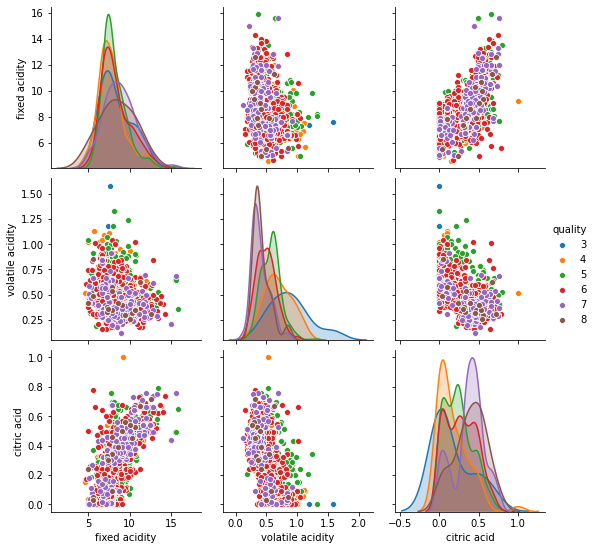

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

features = sns.pairplot(
    data, vars=['fixed acidity', 'volatile acidity',
                'citric acid'], hue='quality')

Visualize the quality distribution:

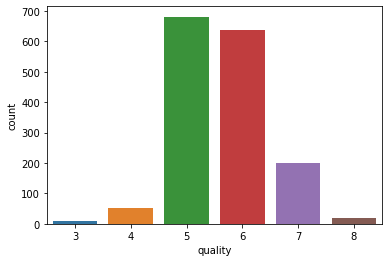

In [72]:
import seaborn as sns

quality_dist = sns.countplot(x="quality", data=data)

Visualize the distributions of each feature:

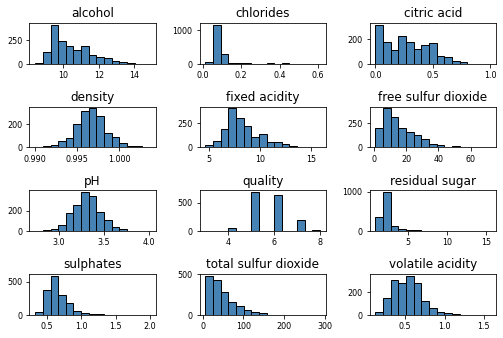

In [73]:
data.hist(bins=15, color='steelblue',
          edgecolor='black', linewidth=1.0,
          xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

## Prepare Data for TensorFlow Consumption

We need to create the feature set and target from the data, so let's do that now:

In [74]:
# create a copy of the DataFrame

df = data.copy()

# create the target

target = df.pop('quality')
target.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

Create a copy of the original DataFrame since the **pop** method removes the column!

In [75]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


Convert Pandas DataFrame values to Numpy with the *values* method:

In [76]:
features = df.values
labels = target.values

## Split into train/test, and scale feature data

In [78]:
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.33, random_state=0)

# scale feature image data and create TensorFlow tensors

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

This is for non-image data!!! So, we use StandardScaler. The idea is to transform continuous feature data to **mean of 0** and **standard deviation of 1** before applying machine learning techniques.

## Prepare Train and Test Sets for TensorFlow Consumption

In [79]:
train_wine = tf.data.Dataset.from_tensor_slices(
    (X_train_std, y_train))
test_wine = tf.data.Dataset.from_tensor_slices(
    (X_test_std, y_test))

Let's view the first **n** tensors:

In [82]:
def see_samples(data, num):
  for feat, targ in data.take(num):
    print ('Features: {}'.format(feat))
    print ('Target: {}'.format(targ), br)

In [83]:
n = 3
see_samples(train_wine, n)

Features: [ 3.79780175 -1.73659008  0.8570712  -0.23338227 -0.25461043 -0.58015323
 -0.67883538  1.73432547 -1.55136219  1.01399624 -1.14014938]
Target: 7 

Features: [-0.36423038 -1.46457323  0.14233674 -0.56361403 -0.57266001  0.34350384
 -0.26605017 -0.96681652 -0.12478467 -1.08185338  0.35801792]
Target: 6 

Features: [ 2.60050484 -0.97494291  1.1123335   2.14428637 -0.43351332 -1.04198176
 -0.35450415  2.44239181 -0.70838456 -0.00560628  1.4816434 ]
Target: 7 



Now, we can shuffle and batch the data:

In [84]:
BATCH_SIZE = 16
SHUFFLE_BUFFER_SIZE = 100

train_wine_ds = train_wine.shuffle(
    SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).prefetch(1)
test_wine_ds = test_wine.batch(BATCH_SIZE).prefetch(1)
train_wine_ds, test_wine_ds

(<PrefetchDataset shapes: ((None, 11), (None,)), types: (tf.float64, tf.int64)>,
 <PrefetchDataset shapes: ((None, 11), (None,)), types: (tf.float64, tf.int64)>)

We set batch size at 16. But, you can try higher or lower ones to see what happens! Higher batch sizes seem to work better and run faster!

## Build the Model

In [85]:
# clear previous model and plant a seed

keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

In [86]:
model = Sequential([
  Dense(30, activation='relu', input_shape=[11,]),
  Dense(11, activation='softmax')
])

## Model Summary

In [87]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                360       
_________________________________________________________________
dense_1 (Dense)              (None, 11)                341       
Total params: 701
Trainable params: 701
Non-trainable params: 0
_________________________________________________________________


## Compile the Model

In [88]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the Model

In [89]:
history = model.fit(train_wine_ds, epochs=10,
                    validation_data=test_wine_ds)

Epoch 1/10
67/67 [==============================] - 0s 5ms/step - loss: 2.3061 - accuracy: 0.1755 - val_loss: 1.8832 - val_accuracy: 0.4754
Epoch 2/10
67/67 [==============================] - 0s 4ms/step - loss: 1.6365 - accuracy: 0.5322 - val_loss: 1.4151 - val_accuracy: 0.5682
Epoch 3/10
67/67 [==============================] - 0s 4ms/step - loss: 1.3104 - accuracy: 0.5621 - val_loss: 1.2116 - val_accuracy: 0.5871
Epoch 4/10
67/67 [==============================] - 0s 4ms/step - loss: 1.1627 - accuracy: 0.5808 - val_loss: 1.1236 - val_accuracy: 0.5890
Epoch 5/10
67/67 [==============================] - 0s 4ms/step - loss: 1.0894 - accuracy: 0.5882 - val_loss: 1.0786 - val_accuracy: 0.5871
Epoch 6/10
67/67 [==============================] - 0s 4ms/step - loss: 1.0463 - accuracy: 0.5920 - val_loss: 1.0549 - val_accuracy: 0.5890
Epoch 7/10
67/67 [==============================] - 0s 4ms/step - loss: 1.0178 - accuracy: 0.5948 - val_loss: 1.0385 - val_accuracy: 0.5852
Epoch 8/10
67/67 [==

# Get Abalone Data from GitHub

In the next section, we work with the Abalone dataset. We show you how to load it from GitHub.


We’ve already located the appropriate URL and assigned it to a variable:

In [90]:
url = 'https://raw.githubusercontent.com/paperd/tensorflow/\
master/chapter4/data/abalone.data'

Read the dataset into a Pandas DataFrame:

In [93]:
# add column headings

cols = ['Sex', 'Length', 'Diameter', 'Height', 'Whole',
        'Shucked', 'Viscera', 'Shell', 'Rings']

abd = pd.read_csv(url, names=cols)

Verify data:

In [94]:
abd.head()

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Abalone DATA

When working with **UCI Machine Learning Repository** data, you may come across data with the **.data** extension. The data contained in this type of file is text data. We can read this data into Pandas with the **read_csv** method just as we did with CSV files. However, we must download the data and read it.

The general site for this dataset is located at the following URL:

* https://archive.ics.uci.edu/ml/datasets/Abalone

The dataset is *abalone.data* and it can be accessed at the following URL:

* https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/

After you browse to this URL, all you have to do is click on the **abalone.data** link to download the DATA file. Since we are working within the Colab environment, you must copy the file to the **Colab Notebooks** directory on your *Google Drive*. The easiest way is to *drag and drop* the DATA file from your **Downloads** directory into Google Drive.

If you want to open the file to view its contents, we recommend using **Notepad** as the editor. We do all of our work within the Windows 10 enviroment.

The other file of interest is *abalone.names*, which provides an in-depth description of the dataset. It can be also be accessed at the following URL:

* https://archive.ics.uci.edu/ml/datasets/Abalone

After you browse to this URL, all you have to do is click on the **abalone.names** link to download the NAMES file.

## Dataset Characteristics

The dataset is used for predicting the age of abalone from physical measurements. The age of abalone is partially determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope. Other measurements supplement age prediction.

Feature variables include:

* sex
* length
* diameter
* height
* whole
* shucked
* viscera
* shell

The target variable is:

* rings

The target variable (rings) can take on a score between 1 and 29. Such scores represent the number of rings for an abalone shell. So, the **number of rings** is the value to predict. The interesting thing about this dataset is that we can use it either as a continuous value experiment or as a classification problem.

## Mount Google Drive to Colab

If you want to work from data on your Google Drive, we must mount Colab.

In [96]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [97]:
# establish path (be sure to copy file to Google Drive)

path = 'gdrive/My Drive/Colab Notebooks/'
abalone = path + 'abalone.data'
abalone

'gdrive/My Drive/Colab Notebooks/abalone.data'

## Read Data into Pandas

In [99]:
cols = ['Sex', 'Length', 'Diameter', 'Height', 'Whole',
        'Shucked', 'Viscera', 'Shell', 'Rings']

ab_data = pd.read_csv(abalone, names=cols)

Display some records:

In [100]:
ab_data.head(3)

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


Display records from end of dataset:

In [101]:
ab_data.tail(3)

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.308,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.296,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,12


Number of records:

In [102]:
len(ab_data)

4177

Identify classes in 'Rings' column:

In [103]:
# classes that represent the 'Rings' feature

print ('classes:', br)
print (np.sort(ab_data['Rings'].unique()))

classes: 

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 29]


So, we have 28 classes ranging from 1 to 27, and 29. Each class represents the age of an Abalone shell in years.

Number of output classes:

In [104]:
# number of classes

print ('number of classes:', len(ab_data['Rings'].unique()))

number of classes: 28


Display class distribution:

In [105]:
instance = ab_data['Rings'].value_counts()
instance.to_dict()

{1: 1,
 2: 1,
 3: 15,
 4: 57,
 5: 115,
 6: 259,
 7: 391,
 8: 568,
 9: 689,
 10: 634,
 11: 487,
 12: 267,
 13: 203,
 14: 126,
 15: 103,
 16: 67,
 17: 58,
 18: 42,
 19: 32,
 20: 26,
 21: 14,
 22: 6,
 23: 9,
 24: 2,
 25: 1,
 26: 1,
 27: 2,
 29: 1}

So, we have '1' abalone shell '1' year of age, '1' abalone shell '2' years of age, '15' abalone shells '3' years of ages, and so on...

Display datatypes:

In [106]:
ab_data.dtypes

Sex          object
Length      float64
Diameter    float64
Height      float64
Whole       float64
Shucked     float64
Viscera     float64
Shell       float64
Rings         int64
dtype: object

Display information about all columns:

In [107]:
ab_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       4177 non-null   object 
 1   Length    4177 non-null   float64
 2   Diameter  4177 non-null   float64
 3   Height    4177 non-null   float64
 4   Whole     4177 non-null   float64
 5   Shucked   4177 non-null   float64
 6   Viscera   4177 non-null   float64
 7   Shell     4177 non-null   float64
 8   Rings     4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Display shape of the DataFrame:

In [108]:
ab_data.shape

(4177, 9)

So, we have 4177 examples and 9 attributes.

## Create Train and Test Sets

In [109]:
train, test = train_test_split(ab_data)

print(len(train), 'train examples')
print(len(test), 'test examples')

3132 train examples
1045 test examples


If you don't specify test size, the default is 0.25 (or 25%).

## Create Feature and Target Sets

Create a copy and place column into target:

In [110]:
train_copy, test_copy = train.copy(), test.copy()

# create the target

train_target, test_target = train_copy.pop('Rings'),\
test_copy.pop('Rings')

Verify targets:

In [111]:
len(train_target), len(test_target)

(3132, 1045)

Verify train feature data:

In [112]:
train_copy.head(3)

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell
940,I,0.460,0.345,0.105,0.449,0.1960,0.0945,0.1265
2688,M,0.630,0.465,0.150,1.027,0.5370,0.1880,0.1760
1948,M,0.635,0.515,0.165,1.229,0.5055,0.2975,0.3535


## Convert Feature Data to Numpy Values

In [113]:
train_features, test_features = train_copy.values,\
test_copy.values

## Scale Features

We can only scale continuous values. Since the sex feature is not continuous, it cannot be scaled. So, we slice off the continuous values to scale. We then recreate train and test sets with the sex feature and scaled continuous values.

Display a sample so we can verify slicing:

In [115]:
train_features[0], test_features[0]

(array(['I', 0.46, 0.345, 0.105, 0.449, 0.196, 0.0945, 0.1265],
       dtype=object),
 array(['M', 0.55, 0.425, 0.155, 0.9175, 0.2775, 0.243, 0.335],
       dtype=object))

Create two train sets (one with sex and the other with continous values):

In [116]:
train_sex = [row[0] for row in train_features]
train_f = [row[1:] for row in train_features]
train_sex[0], train_f[0]

('I', array([0.46, 0.345, 0.105, 0.449, 0.196, 0.0945, 0.1265], dtype=object))

Create two test sets (one with sex and the other with continous values):

In [117]:
test_sex = [row[0] for row in test_features]
test_f = [row[1:] for row in test_features]
test_sex[0], test_f[0]

('M', array([0.55, 0.425, 0.155, 0.9175, 0.2775, 0.243, 0.335], dtype=object))

Scale continuous values:

In [118]:
train_sc = scaler.fit_transform(train_f)
test_sc = scaler.fit_transform(test_f)

Create train and test sets with sex and scaled values:

In [119]:
train_ds = [np.append(train_sex[i], row)
for i, row in enumerate(train_sc)]

test_ds = [np.append(test_sex[i], row)
for i, row in enumerate(test_sc)]

train_ds[0], test_ds[0]

(array(['I', '-0.5539720150785379', '-0.6559333602766398',
        '-0.8211004378454012', '-0.7927915873345437',
        '-0.7526317555313695', '-0.8016001909009411',
        '-0.8252762430150634'], dtype='<U32'),
 array(['M', '0.2614317441034712', '0.21602505424971047',
        '0.44367952533410815', '0.23087500908915165',
        '-0.32043732600158525', '0.6054586014932206', '0.7419788416599444'],
       dtype='<U32'))

Convert numpy feature sets into pandas DataFrames

In [121]:
col = ['Sex', 'Length', 'Diameter', 'Height', 'Whole',
       'Shucked', 'Viscera', 'Shell']

train_ab = pd.DataFrame(train_ds, columns=col)
test_ab = pd.DataFrame(test_ds, columns=col)

Verify train features:

In [122]:
train_ab.tail(3)

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell
3129,M,0.5789990955701353,0.41185984745829424,0.11456868033972055,0.24918336699361837,0.4509756980247627,0.22340827110437553,0.08812680029658754
3130,F,0.8307704534920629,0.8186382123096974,0.5824032394322819,0.5924221754781892,0.5140862012074815,0.49796410914151396,0.5556165468734168
3131,I,-0.9735909449484174,-0.8593225427023411,-0.7041417980722608,-1.0440914292607475,-1.038882966395843,-0.9800614856250811,-1.008676066672127


Verify test features:

In [123]:
test_ab.tail(3)

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell
1042,M,-0.18716624044189956,-0.02977871501307618,-0.45710197003615755,-0.2913686639789352,-0.3970492055291762,-0.1367960937670394,-0.2984126317100943
1043,M,0.9955011733595315,1.0517578697431864,0.8297287376356508,1.1534377622911416,0.9842179165418012,1.184779339257326,1.2729372487591362
1044,F,0.7100297286488411,0.7076325927752842,0.7010456668684699,0.5123176111122258,0.38033604261843734,0.3927392680954632,0.8998313410678125


## Build Input Pipeline

Prepare train and test data for TensorFlow consumption:

In [125]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (dict(train_ab), train_target))
test_ds = tf.data.Dataset.from_tensor_slices(
    (dict(test_ab), test_target))

Shuffle, Batch, and Prefetch:

In [126]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 100

train_ads = train_ds.shuffle(
    SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).prefetch(1)
test_ads = test_ds.batch(BATCH_SIZE).prefetch(1)
train_ads, test_ads

(<PrefetchDataset shapes: ({Sex: (None,), Length: (None,), Diameter: (None,), Height: (None,), Whole: (None,), Shucked: (None,), Viscera: (None,), Shell: (None,)}, (None,)), types: ({Sex: tf.string, Length: tf.string, Diameter: tf.string, Height: tf.string, Whole: tf.string, Shucked: tf.string, Viscera: tf.string, Shell: tf.string}, tf.int64)>,
 <PrefetchDataset shapes: ({Sex: (None,), Length: (None,), Diameter: (None,), Height: (None,), Whole: (None,), Shucked: (None,), Viscera: (None,), Shell: (None,)}, (None,)), types: ({Sex: tf.string, Length: tf.string, Diameter: tf.string, Height: tf.string, Whole: tf.string, Shucked: tf.string, Viscera: tf.string, Shell: tf.string}, tf.int64)>)

## Explore a Batch

In [127]:
def see_format(data, num, feature, indx):
  for feature_batch, label_batch in data.take(num):
    print('Every feature:', list(feature_batch.keys()))
    print('One example from a batch of ' + feature + ':',
          feature_batch[feature][indx])
    print('One example from a batch of targets:',
          label_batch[indx])

print ('train sample:')
see_format(train_ads, 1, 'Height', 0)
print ()
print ('test sample:')
see_format(test_ads, 1, 'Sex', 0)

train sample:
Every feature: ['Sex', 'Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell']
One example from a batch of Height: tf.Tensor(b'-0.47022451852598046', shape=(), dtype=string)
One example from a batch of targets: tf.Tensor(7, shape=(), dtype=int64)

test sample:
Every feature: ['Sex', 'Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell']
One example from a batch of Sex: tf.Tensor(b'M', shape=(), dtype=string)
One example from a batch of targets: tf.Tensor(13, shape=(), dtype=int64)


## Categorical Columns

TensorFlow consumption is limited to numeric data. So, we must convert any categorical data. The only culprit in this scenario is the 'Sex' feature because it is represented by string values of either 'M', 'F' or 'I'. So, sex for the abalone shell is either male, female or infant.

Since we cannot feed strings directly to a model, we must first map them to numeric values. The categorical vocabulary columns provide a way to represent strings as a **one-hot vector**. This process is called one-hot encoding.

Here is how the strings are converted:

1. 'M' => 1 0 0
2. 'F' => 0 1 0
3. 'I' => 0 0 1

One-Hot encode the Sex feature for TensorFlow consumption:

In [128]:
from tensorflow import feature_column

sex_one_hot =\
feature_column.categorical_column_with_vocabulary_list(
    'Sex', ['M', 'F', 'I'])

print (type(sex_one_hot))

feature_columns =\
[tf.feature_column.indicator_column(sex_one_hot)]

feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

<class 'tensorflow.python.feature_column.feature_column_v2.VocabularyListCategoricalColumn'>


Import the feature_column module. One-hot encode 'Sex'. Create the **feature_columns** list. We create a list so we can have multiple categorical features in a training dataset. Finally, create the **feature_layer** for the model.

For a comprehensive example, we recommend that you peruse the following URL:

* https://www.tensorflow.org/tutorials/structured_data/feature_columns

# Build the Model

In [129]:
# clear previous model and plant a seed

keras.backend.clear_session()

model = tf.keras.Sequential([
  feature_layer,
  Dense(128, activation='relu'),
  Dense(128, activation='relu'),
  Dense(29, activation='sigmoid')
])

Notice that we included the **feature_layer** as the first layer in the neural network model. We only run the model for one epoch for demonstration purposes.

# Compile the Model

In [130]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model

In [131]:
model.fit(train_ads,
          validation_data=test_ads,
          epochs=1)

Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
95/98 [============================>.] - ETA: 0s - loss: 2.8067 - accuracy: 0.1836WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'Sex': <tf.Tensor 'ExpandDims_3:0' shape=(None, 1) dtype=string>, 'Length': <tf.Tensor 'ExpandDims_2:0' shape=(None, 1) dtype=string>, 'Diameter': <tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=string>, 'Height': <tf.Tensor 'ExpandDims_1:0' shape=(None, 1) dtype=string>, 'Whole': <tf.Tensor 'ExpandDims_7:0' shape=(None, 1) dtype=string>, 'Shucked': <tf.Tensor 'ExpandDims_5:0' shape=(None, 1) dtype=string>, 'Viscera': <tf.Tensor 'ExpandDims_6:0' shape=(None, 1) dtype=string>, 'Shell': <tf.Tensor 'ExpandDims_4:0' shape=(None, 1) dtype=string>}
Consider rewriting this model with the Functional API.
98/98 [==============================] - 1s 6ms/step - loss: 2.7932 - accura

## Unbalanced and Irregular Data

The Abalone dataset is **not** a good dataset to make predictions for two reasons:

1. the dataset is unbalanced
2. the dataset is irregular

An **unbalanced dataset** is one where the classes are not represented equally. That is, classes don't have the same number of examples. This dataset is especially unbalanced because some classes have one example while others have hundreds of examples. Training with an unbalanced dataset won't produce good results. So, we won't learn much.

An **irregular dataset** is one with too many target (or label) classes, but not enough data. We should always check the number of samples (or examples) per label in our dataset. A class label with not enough samples is harder to learn from.

We only introduced this example to show you how to work with datasets with datatype 'DATA'.

## Dealing with Unbalanced Data

We can deal with unbalanced data in a variety of ways. We can change the algorithm. Some algorithms may work better than others. So, try a variety of them. Oversample by adding more instances to the minority class or classes. We can also under-sample by removing observations from the majority class or classes. Finally, we can augment the data.

For a more detailed explanation, consult the following URL:

https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18
